In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [4]:
transfer = pd.read_csv('/Users/cody/Documents/GitHub/Capstone/transfer_dataset.csv')

In [5]:
transfer.head()

,transfer,player,age,season,minutes,matches_played,play_proportion,raw_goals,raw_assists,raw_nonpenaltykick_goal,...,TakeOn_Success_Percentage,tackle_ratio,Shot_Blocks,Pass_Blocks,Clearances,Aerial_Win_Percentage,aerials_total,FW,MF,DF
0,1,Fabinho,24,2017-2018,3060.0,34,1.000000,7,3,3,...,72.5,0.561404,13,35,62,67.6,139,0,1,0
1,1,Rachid Ghezzal,26,2017-2018,1006.0,26,0.866667,2,3,2,...,52.7,0.774194,0,17,2,29.0,31,1,1,0
2,1,Nampalys Mendy,26,2017-2018,965.0,14,0.500000,0,1,0,...,75.0,0.461538,1,8,10,50.0,6,0,1,0
3,1,Max Gradel,30,2017-2018,2415.0,29,1.000000,8,1,4,...,55.2,0.571429,2,37,30,20.6,63,1,1,0
4,1,Issa Diop,21,2017-2018,3060.0,34,1.000000,3,0,3,...,73.3,0.741379,25,13,128,61.3,93,0,0,1


In [6]:
X = transfer.drop(columns = ['transfer', 'player', 'season'])
y = transfer['transfer']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=12)

In [8]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test,y_pred)

In [11]:
print(accuracy)

0.9379243452958292


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

<function matplotlib.pyplot.show(close=None, block=None)>

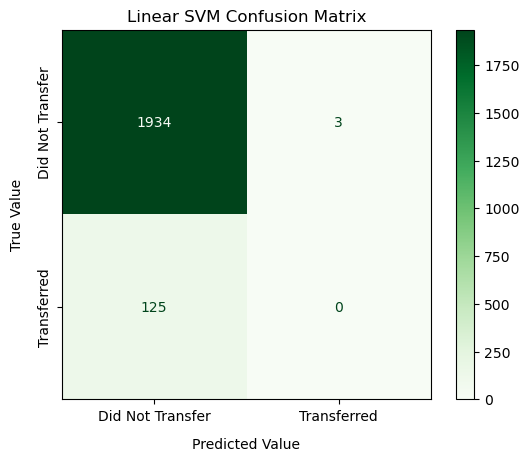

In [25]:
binary_names = ['Did Not Transfer', 'Transferred']
conf = ConfusionMatrixDisplay(conf_matrix, display_labels= binary_names)
conf.plot(cmap = plt.cm.Greens)
plt.title("Linear SVM Confusion Matrix")
plt.xlabel("Predicted Value", labelpad = 10)
plt.ylabel("True Value", labelpad = 10)
plt.yticks(rotation = 90, va='center')
plt.show